In [3]:
import numpy as np
import pandas as pd
import os
import pyarrow.parquet as pa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Tables

In [4]:
li_power = []
for file in os.listdir("PowerInfo"):
    li_power.append(pd.read_parquet(f"PowerInfo/{file}"))
PowerInfo = pd.concat(li_power, axis=0, ignore_index=True)


In [5]:
li_period = []
for file in os.listdir("PeriodInfo"):
    li_period.append(pd.read_parquet(f"PeriodInfo/{file}"))
PeriodInfo = pd.concat(li_period, axis=0, ignore_index=True)


In [6]:
li_gameInfo = []
for file in os.listdir("GameInfo"):
    li_gameInfo.append(pd.read_parquet(f"GameInfo/{file}"))
GameInfo = pd.concat(li_gameInfo, axis=0, ignore_index=True)

In [7]:
li_homeTeam = []
for file in os.listdir("MatchHomeTeamInfo"):
    li_homeTeam.append(pd.read_parquet(f"MatchHomeTeamInfo/{file}"))
MatchHomeTeamInfo = pd.concat(li_homeTeam, axis=0, ignore_index=True)

C:\Users\fz\AppData\Local\Temp\ipykernel_18808\1057753253.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MatchHomeTeamInfo = pd.concat(li_homeTeam, axis=0, ignore_index=True)


In [8]:
li_awayTeam=[]
for file in os.listdir("MatchAwayTeamInfo"):
    li_awayTeam.append(pd.read_parquet(f"MatchAwayTeamInfo/{file}"))
MatchAwayTeamInfo = pd.concat(li_awayTeam, axis=0, ignore_index=True)

C:\Users\fz\AppData\Local\Temp\ipykernel_18808\2603646164.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MatchAwayTeamInfo = pd.concat(li_awayTeam, axis=0, ignore_index=True)


In [9]:
li_MatchEventInfo = []
for file in os.listdir("MatchEventInfo"):
    li_MatchEventInfo.append(pd.read_parquet(f"MatchEventInfo/{file}"))
MatchEventInfo = pd.concat(li_MatchEventInfo, axis=0, ignore_index=True)


In [10]:
li_homeScore = []
for file in os.listdir("MatchHomeScoreInfo"):
    li_homeScore.append(pd.read_parquet(f"MatchHomeScoreInfo/{file}"))
MatchHomeScoreInfo = pd.concat(li_homeScore, axis=0, ignore_index=True)


In [11]:
li_awayScore=[]
for file in os.listdir("MatchAwayScoreInfo"):
    li_awayScore.append(pd.read_parquet(f"MatchAwayScoreInfo/{file}"))
MatchAwayScoreInfo = pd.concat(li_awayScore, axis=0, ignore_index=True)

In [13]:
li_round = []
for file in os.listdir("MatchRoundInfo"):
    li_round.append(pd.read_parquet(f"MatchRoundInfo/{file}"))
MatchRoundInfo = pd.concat(li_round, axis=0, ignore_index=True)

In [12]:
li_season = []
for file in os.listdir("MatchSeasonInfo"):
    li_season.append(pd.read_parquet(f"MatchSeasonInfo/{file}"))
MatchSeasonInfo = pd.concat(li_season, axis=0, ignore_index=True)

In [14]:
li_time = []
for file in os.listdir("MatchTimeInfo"):
    li_time.append(pd.read_parquet(f"MatchTimeInfo/{file}"))
MatchTimeInfo = pd.concat(li_time, axis=0, ignore_index=True)

In [15]:
li_tournament = []
for file in os.listdir("MatchTournamentInfo"):
    li_tournament.append(pd.read_parquet(f"MatchTournamentInfo/{file}"))
MatchTournamentInfo = pd.concat(li_tournament, axis=0, ignore_index=True)

In [16]:
li_venue = []
for file in os.listdir("MatchVenueInfo"):
    li_venue.append(pd.read_parquet(f"MatchVenueInfo/{file}"))
MatchVenueInfo = pd.concat(li_venue, axis=0, ignore_index=True)


In [17]:
li_votes = []
for file in os.listdir("MatchVotesInfo"):
    li_votes.append(pd.read_parquet(f"MatchVotesInfo/{file}"))
MatchVotesInfo = pd.concat(li_votes, axis=0, ignore_index=True)

In [18]:
li_odds = []
for file in os.listdir("OddsInfo"):
    li_odds.append(pd.read_parquet(f"OddsInfo/{file}"))
OddsInfo = pd.concat(li_odds, axis=0, ignore_index=True)

# QUESTIONS

# 1. How many tennis players are included in the dataset? 

In [44]:
away = MatchAwayTeamInfo
home = MatchHomeTeamInfo
players = pd.concat([home, away], ignore_index=True)
players["player_id"].nunique()

596

# 2. average years of being a pro tennis player ? 

In [65]:
import datetime
year = datetime.datetime.now().year
tmp = players[["player_id", "turned_pro"]]
tmp.loc[:, "turned_pro"] = pd.to_numeric(tmp["turned_pro"])
tmp.loc[:, "exp"] = year - tmp.loc[:, "turned_pro"]
median = tmp.dropna()["exp"].median()
print(f'the average years of being pro is {median}')


the average years of being pro is 12.0


C:\Users\fz\AppData\Local\Temp\ipykernel_18772\1428076973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "exp"] = year - tmp.loc[:, "turned_pro"]


# 3. Which player has the highest number of wins? 

first we separate winners of both teams

In [9]:
x=MatchEventInfo.dropna(subset=['winner_code'])
x_home=x[x['winner_code']==1]
x_away=x[x['winner_code']==2]
final_away=x_away.merge(MatchAwayTeamInfo, how="left", left_on="match_id", right_on="match_id")[['match_id','winner_code','player_id','slug']]
final_home=x_home.merge(MatchHomeTeamInfo, how="left", left_on="match_id", right_on="match_id")[['match_id','winner_code','player_id','slug']]
final_away=final_away.groupby(by=['player_id','slug'], as_index=False).agg(no_awaywin=("winner_code","count"))
final_home=final_home.groupby(by=['player_id','slug'], as_index=False).agg(no_homewin=("winner_code","count"))
final=final_away.merge(final_home,how='outer')
final
final=final.fillna(0)
final['total_win']=final['no_awaywin']+final['no_homewin']
final=final.groupby(by=['player_id','slug'], as_index=False).agg(total=("total_win","sum"))
finalq1=final.sort_values('total',ascending=False, ignore_index=True)
finalq1

,player_id,slug,total
0,98951.0,milushev-plamen,3.0
1,413166.0,panaras-adam,3.0
2,416491.0,kalina-vit,3.0
3,15894.0,mannarino-adrian,2.0
4,144102.0,weis-alexander,2.0
...,...,...,...
367,204329.0,hsu-yu-hsiou,1.0
368,203756.0,reayer-alisha,1.0
369,200009.0,carbonaro-giulia,1.0
370,197534.0,nagata-anri,1.0


# 4. What is the longest match recorded in terms of duration? 

Calculating the total duration for each match

In [34]:
MatchTimeInfo.fillna(0,inplace=True)
MatchTimeInfo['sum_periods'] = MatchTimeInfo.apply(lambda row: row['period_1'] + row['period_2'] + row['period_3'] +row['period_4'] + row['period_5'], axis=1)

C:\Users\fz\AppData\Local\Temp\ipykernel_3912\193850644.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatchTimeInfo.fillna(0,inplace=True)


Finding the match with the maximum total duration

In [35]:
sum_periods_max = MatchTimeInfo['sum_periods'].max()
print('maximum time : ', sum_periods_max)
longest_match_index = MatchTimeInfo['sum_periods'].idxmax()
longest_match = MatchTimeInfo.loc[longest_match_index ].
print('match_id of match whith maximum time :',MatchTimeInfo.loc[longest_match_index ]['match_id'])

maximum time :  12835
match_id of match whith maximum time : 11699235


Drawing a bar plot for the match with the maximum total duration

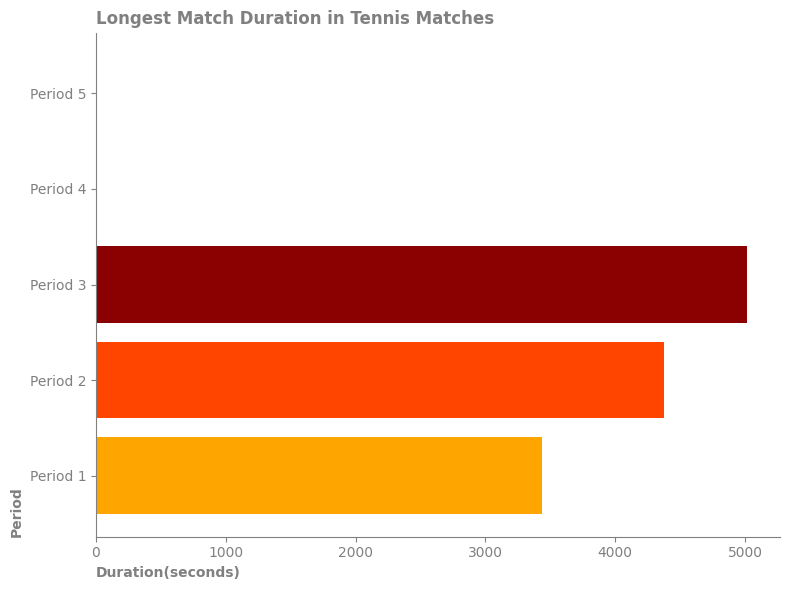

In [36]:
# Drawing a bar plot
plt.figure(figsize=(8, 6))
colors = ['orange','orangered','darkred','black']
period = ['Period 1', 'Period 2' , 'Period 3', 'Period 4', 'Period 5']
plt.barh(period, longest_match.values[1:6], color=colors)
plt.title('Longest Match Duration in Tennis Matches',fontweight='bold',loc='left',color='grey')
plt.xlabel('Duration(seconds)',fontsize=10,fontweight='bold',loc='left',color='grey')
plt.ylabel('Period',fontsize=10,fontweight='bold',loc='bottom',color='grey')
plt.tight_layout()
plt.xticks(rotation=360)
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('white')
plt.tick_params(axis='x',colors='grey')
plt.tick_params(axis='y',colors='grey')
plt.show()

# 5. How many sets are typically played in a tennis match? 

In [9]:
gamesInfo = GameInfo[["match_id", "set_id"]]

gamesInfo = gamesInfo.drop_duplicates(ignore_index=True)

gamesInfo.groupby(["match_id"]).count().median()["set_id"]

2.0

In [10]:
# Get games data
away = MatchAwayScoreInfo[["match_id", "display_score"]]
home = MatchHomeScoreInfo[["match_id", "display_score"]]

# Merge Games info
df = pd.merge(home, away, on=["match_id"], suffixes=("_home", "_away"))

# Count sets
df.loc[:, "sets"] = df.loc[:, "display_score_home"] + df.loc[:, "display_score_away"]

# Prepare for final resault
df = df.dropna()
# x = df[df["sets"] > 1]

# Count sets 
df.groupby("sets")["sets"].count()

sets
0      3
1      4
2    551
3    181
Name: sets, dtype: int64

# 6. Which country has produced the most successful tennis players? 

In [167]:
#creating a dataframe consisting all players
whole_teaminfo=pd.concat([MatchHomeTeamInfo,MatchAwayTeamInfo],axis=0, ignore_index=True)

#drop those with unknown ranking
whole_teaminfo=whole_teaminfo.dropna(subset='current_rank')

# #choose top 100 player and drop duplicates 
whole_teaminfo=whole_teaminfo[whole_teaminfo['current_rank']<101]
whole_teaminfo=whole_teaminfo.drop_duplicates(subset='player_id')

# #calculating the number of players in each country based on gender
df1=whole_teaminfo.groupby(['country','gender'],as_index=False).agg(Player_No=('player_id','count'))
df2=whole_teaminfo.groupby(['country'],as_index=False).agg(Player_No_total=('player_id','count'))
results=df1.merge(df2, on='country', how='left')
results=results.sort_values('Player_No_total',ignore_index=True, ascending=False,kind='mergesort')
results.head(11)


,country,gender,Player_No,Player_No_total
0,Czech Republic,F,7,9
1,Czech Republic,M,2,9
2,USA,F,7,8
3,USA,M,1,8
4,Russia,F,5,6
5,Russia,M,1,6
6,China,F,5,5
7,France,F,1,5
8,France,M,4,5
9,Italy,F,1,3


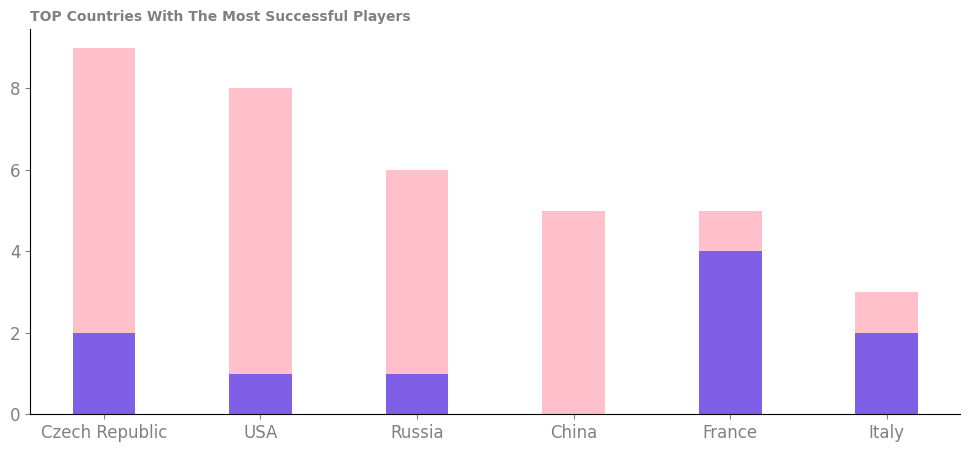

In [18]:
#using top rows to draw the plot
q6df=results.head(11)
fig6, (ax6)= plt.subplots(figsize = (12, 5))

ax6.bar(q6df[q6df['gender']=='F']['country'], q6df[q6df['gender']=='F']['Player_No_total'], color ='pink', 
        width = 0.4, alpha=1)
ax6.bar(q6df[q6df['gender']=='M']['country'], q6df[q6df['gender']=='M']['Player_No'], color ='blue', 
        width = 0.4,alpha=0.5)

ax6.set_title(
    "TOP Countries With The Most Successful Players",
    weight="bold",
    color="gray",
    fontsize=10,
    loc="left",
)
ax6.spines[["right", "top"]].set_visible(False)
ax6.tick_params(axis="x", colors="gray", labelsize="large")
ax6.tick_params(axis="y", colors="gray", labelsize="large")


To answer the question we first should define who is a successful player. we decide that those with higher ranks despite their recent matches are the best candidate.
as we know top 100 ranks data are more available for females so we dicide to report our analysis based on gender too.

 # 7. What is the average number of aces per match? 

cleaning period table  by just selecting rows with _statistic name_ ,`Aces`, and _period_ `All`( it represents the entire match stats)



` Match` A contest between two players (singles match) or two teams of players (doubles match), normally played as the best of three or five sets.

` Set `  A unit of scoring. A set consists of games and the first player to win six games with a two-game advantage wins the set.

`Game`  A game consists of a sequence of points played with the same player serving and is a segment of a set.

`Point`  A point in tennis is the smallest subdivision of the match.

`Ace`   In tennis, an ace is a legal serve that is not touched by the receiver, winning the point for the server.


average number of aces per match : 4.816091954022989


C:\Users\fz\AppData\Local\Temp\ipykernel_18772\3681608745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period[['home_stat', 'away_stat']] = period[['home_stat', 'away_stat']].astype('Int64')
C:\Users\fz\AppData\Local\Temp\ipykernel_18772\3681608745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['sum'] = period[['home_stat', 'away_stat']].sum(axis=1)


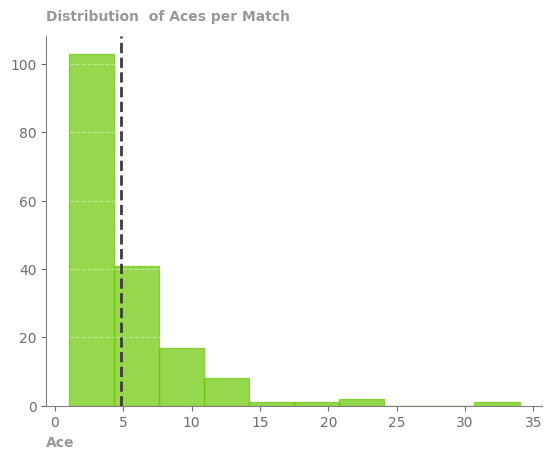

In [111]:


period=PeriodInfo.loc[(PeriodInfo['statistic_name']=='aces') & (PeriodInfo["period"]=="ALL")]
period[['home_stat', 'away_stat']] = period[['home_stat', 'away_stat']].astype('Int64')
period['sum'] = period[['home_stat', 'away_stat']].sum(axis=1)
period =period[period["sum"]!= 0].reset_index().drop("index", axis=1)
period =period.dropna(axis=1 , how="all")
print(f"average number of aces per match : {period["sum"].mean()}")

fig =plt.figure()
ax = plt.axes()
plt.hist(period["sum"] , bins=10 ,color="#69C803", edgecolor="#6BC708" , alpha=0.7)
ax.axvline(period["sum"].mean(), color='#3C3C3C', linestyle='dashed', linewidth=2 , label="mean")
ax.spines[["top" , "right"]].set_visible(False)
ax.spines[['bottom' , 'left']].set_color('gray')
ax.grid(axis="y" ,linestyle="--" , color="white" , alpha=.4 )
ax.set_title("Distribution  of Aces per Match ", weight="bold", fontsize="10",  color="#6D6D6D",  loc="left",y=1.02 ,alpha=.7)
ax.set_xlabel("Ace" ,loc="left", color="#6D6D6D" ,weight="bold" , alpha=.7)
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )


plt.show()



The chart shows the number of aces which both sides of the game (away and home) hit in each match .

On average , players get `almost 5 aces per match.`

# 8. Is there a difference in the number of double faults based on gender? 

creating tables of both teams  and merging them with Period table which contains all information about points in games

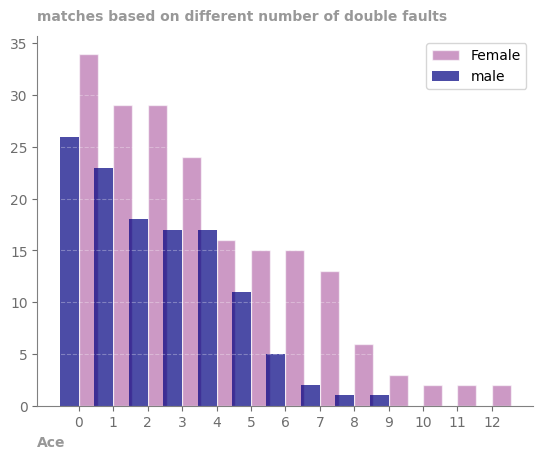

TtestResult(statistic=4.027386603188488, pvalue=7.103697548198314e-05, df=309.0)

In [125]:
home_subdf=MatchHomeTeamInfo[['match_id','gender','player_id']]
away_subdf=MatchAwayTeamInfo[['match_id','gender','player_id']]

period_subdf=PeriodInfo[(PeriodInfo['statistic_name']=='double_faults') & (PeriodInfo['period']=='ALL')]

home_subdf=period_subdf.merge(home_subdf,left_on='match_id',right_on='match_id',how='left')
home_subdf=home_subdf[['match_id','home_value','gender','player_id']]
away_subdf=period_subdf.merge(away_subdf,left_on='match_id',right_on='match_id',how='left')
away_subdf=away_subdf[['match_id','away_value','gender','player_id']]

away_subdf=away_subdf.dropna(subset='gender')
home_subdf=home_subdf.dropna(subset='gender')

home_subdf=home_subdf.rename(columns={'home_value':'doublefault_no'})
away_subdf=away_subdf.rename(columns={'away_value':'doublefault_no'})

total_double_gender=pd.concat([home_subdf,away_subdf],axis=0,ignore_index=True)
total_double_gender.groupby('gender')['doublefault_no'].sum()

female = total_double_gender[total_double_gender['gender']=='F']
male = total_double_gender[total_double_gender['gender']=='M']

cat_female = total_double_gender[total_double_gender['gender']=='F']["doublefault_no"].value_counts()
cat_male = total_double_gender[total_double_gender['gender']=='M']["doublefault_no"].value_counts()



fig =plt.figure()
ax = plt.axes()
plt.bar(range(len(cat_female)), cat_female, align='edge', width=0.55, label='Female' , color='#AB569F' , alpha= .6 , edgecolor='white')
plt.bar(range(len(cat_male)), cat_male, align='edge', width=-0.55, label='male', color='#000080' , alpha= .7 )

plt.xticks(np.arange(len(cat_female)), rotation=0)
plt.title("matches based on different number of double faults " ,  weight="bold", fontsize="10",  color="#6D6D6D",  loc="left",y=1.02 ,alpha=.7)
ax.spines[["top" , "right"]].set_visible(False)
ax.spines[['bottom' , 'left']].set_color('gray')
ax.grid(axis="y" ,linestyle="--" , color="white" , alpha=.3 )
ax.set_xlabel("Ace" ,loc="left", color="#6D6D6D" ,weight="bold" , alpha=.7)
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )
plt.legend()
plt.show()

ttest_ind(female['doublefault_no'], male['doublefault_no'])

# 9. Which player has won the most tournaments in a single month? 

Selecting all the final matches

In [13]:
final_matches = MatchRoundInfo[MatchRoundInfo['name'] == 'Final']
merged_df= pd.merge(final_matches,MatchEventInfo,on = "match_id",how="inner")

# final_matches
# merged_df

Seprating winners at home and winners away

In [14]:
home_winner = merged_df[merged_df['winner_code'] == 1]

away_winner = merged_df[merged_df['winner_code'] == 2]

# home_winner
# away_winner


Extracting necessary columns from the new DataFrame

In [6]:
selecte_columns = ['match_id','name', 'winner_code','start_datetime']
new_df_away_winners = away_winner[selecte_columns]
new_df_home_winners = home_winner[selecte_columns]
new_df_away_winners.head(5)

,match_id,name,winner_code,start_datetime
1,11673993,Final,2,1696154400
2,11674011,Final,2,1696172400
5,11698055,Final,2,1696122000
6,11698379,Final,2,1696143600
8,11698476,Final,2,1696150200


Merging two DataFrames and select necessary columns for away winners

In [7]:
merged_df_= pd.merge(new_df_away_winners ,MatchAwayTeamInfo,on = "match_id",how="inner")
selecte_columns_= ['match_id','name_x', 'winner_code','start_datetime','name_y','player_id','name_code','country', 'full_name']
df_away_team= merged_df_[selecte_columns_]
print(df_away_team)

    match_id name_x winner_code  start_datetime           name_y  player_id  \
0   11673993  Final           2      1696154400  Roca Batalla O.      51100   
1   11674011  Final           2      1696172400      Shelbayh A.     307383   
2   11698055  Final           2      1696122000            Ma Y.     190950   
3   11698379  Final           2      1696143600        Safwat M.      42029   
4   11698476  Final           2      1696150200        Gaubas V.     322022   
5   11698477  Final           2      1696148400      Martynov D.     288575   
6   11698544  Final           2      1696143600         Tabur C.     206602   
7   11698550  Final           2      1696154100       Paulson A.     275467   
8   11698735  Final           2      1696149000    Bartunkova N.     348987   
9   11698749  Final           2      1696150800    Gjorcheska L.      67743   
10  11698861  Final           2      1696163400        Glinka D.     210033   
11  11699173  Final           2      1696165200  Gui

Merging two DataFrames and select necessary columns for home winners

In [8]:
merged_df_home= pd.merge(new_df_home_winners,MatchHomeTeamInfo,on = "match_id",how="inner")
selecte_columns_home= ['match_id','name_x', 'winner_code','start_datetime','name_y','player_id','name_code','country', 'full_name']
df_home_team = merged_df_home[selecte_columns_home]
print(df_home_team)

   match_id name_x winner_code  start_datetime               name_y  \
0  11673962  Final           1      1696176000           Tirante T.   
1  11674032  Final           1      1696171500            Machač T.   
2  11674074  Final           1      1696129200       Kudermetova V.   
3  11698403  Final           1      1696143600             Kubka M.   
4  11698683  Final           1      1696149000       Cid Subervi R.   
5  11698757  Final           1      1696154400  Guerrero Álvarez E.   
6  11699097  Final           1      1696165200       Janicijevic S.   
7  11699296  Final           1      1696168500           Biolay  S.   
8  11699386  Final           1      1696189200          Townsend T.   

   player_id name_code             country                full_name  
0     221515       TIR           Argentina  Tirante, Thiago Agustin  
1     238300       MAC      Czech Republic            Machač, Tomáš  
2      66968       KUD              Russia    Kudermetova, Veronika  
3     294

All the winners

In [9]:
all_winners = pd.concat([df_home_team,df_away_team],ignore_index=True)
all_winners.head(25)

,match_id,name_x,winner_code,start_datetime,name_y,player_id,name_code,country,full_name
0,11673962,Final,1,1696176000,Tirante T.,221515,TIR,Argentina,"Tirante, Thiago Agustin"
1,11674032,Final,1,1696171500,Machač T.,238300,MAC,Czech Republic,"Machač, Tomáš"
2,11674074,Final,1,1696129200,Kudermetova V.,66968,KUD,Russia,"Kudermetova, Veronika"
3,11698403,Final,1,1696143600,Kubka M.,294815,KUB,Poland,"Kubka, Martyna"
4,11698683,Final,1,1696149000,Cid Subervi R.,51309,CID,Dominican Republic,"Cid Subervi, Roberto"
5,11698757,Final,1,1696154400,Guerrero Álvarez E.,132414,GUE,Spain,"Guerrero Alvarez, Eva"
6,11699097,Final,1,1696165200,Janicijevic S.,299619,JAN,France,"Janicijevic, Selena"
7,11699296,Final,1,1696168500,Biolay S.,292051,BIO,France,"Biolay, Sophia"
8,11699386,Final,1,1696189200,Townsend T.,51387,TOW,USA,"Townsend, Taylor"
9,11673993,Final,2,1696154400,Roca Batalla O.,51100,ROC,Spain,"Roca Batalla, Oriol"


Changing the format and adding a month column

In [10]:
all_winners['start_datetime'] = pd.to_datetime(all_winners['start_datetime'],unit='s')
all_winners['month'] = all_winners['start_datetime'].dt.month
print(all_winners)

    match_id name_x winner_code      start_datetime               name_y  \
0   11673962  Final           1 2023-10-01 16:00:00           Tirante T.   
1   11674032  Final           1 2023-10-01 14:45:00            Machač T.   
2   11674074  Final           1 2023-10-01 03:00:00       Kudermetova V.   
3   11698403  Final           1 2023-10-01 07:00:00             Kubka M.   
4   11698683  Final           1 2023-10-01 08:30:00       Cid Subervi R.   
5   11698757  Final           1 2023-10-01 10:00:00  Guerrero Álvarez E.   
6   11699097  Final           1 2023-10-01 13:00:00       Janicijevic S.   
7   11699296  Final           1 2023-10-01 13:55:00           Biolay  S.   
8   11699386  Final           1 2023-10-01 19:40:00          Townsend T.   
9   11673993  Final           2 2023-10-01 10:00:00      Roca Batalla O.   
10  11674011  Final           2 2023-10-01 15:00:00          Shelbayh A.   
11  11698055  Final           2 2023-10-01 01:00:00                Ma Y.   
12  11698379

Grouping winners based on the month of the match

In [11]:
grouping = all_winners.groupby('month').size()
print(grouping)

month
10    22
dtype: int64


Grouping winners based on thir names

In [12]:
grouping_= all_winners.groupby('full_name').size()
print(grouping_)

full_name
Bartunkova, Nikola         1
Biolay, Sophia             1
Cid Subervi, Roberto       1
Draxl, Liam                1
Gaubas, Vilius             1
Gjorcheska, Lina           1
Glinka, Daniil             1
Guerrero Alvarez, Eva      1
Guillen Meza, Alvaro       1
Janicijevic, Selena        1
Kubka, Martyna             1
Kudermetova, Veronika      1
Ma, Yexin                  1
Machač, Tomáš              1
Martynov, Diana            1
Paulson, Andrew            1
Roca Batalla, Oriol        1
Safwat, Mohamed            1
Shelbayh, Abedallah        1
Tabur, Clement             1
Tirante, Thiago Agustin    1
Townsend, Taylor           1
dtype: int64


# 10. Is there a correlation between a player's height and their ranking? 

as you can see we can't tell there is a relationship between height and rank.<br/>
when height goes higher rank data doesn't nessesory raise and also when rank goes up height doesn't increas
but we can tell the must of players are between 1.7 and 2 meter long and our highest rank is between 1.8 and 1.9 meter long (like 1.85 meter)

In [11]:
plot_feed = players[["player_id", "gender", "height", "current_rank", "current_prize"]]
plot_feed = plot_feed.dropna()
plot_feed["height_rank"] = plot_feed["height"].rank(ascending=False, method='min')
men = plot_feed[plot_feed["gender"] == "M"]
women = plot_feed[plot_feed["gender"] == "F"]

In [12]:
plot_feed.groupby("gender")[["current_rank", "height_rank"]].corr(method="spearman")

current_rank  height_rank
gender                                        
F      current_rank      1.000000     0.249057
       height_rank       0.249057     1.000000
M      current_rank      1.000000     0.153715
       height_rank       0.153715     1.000000

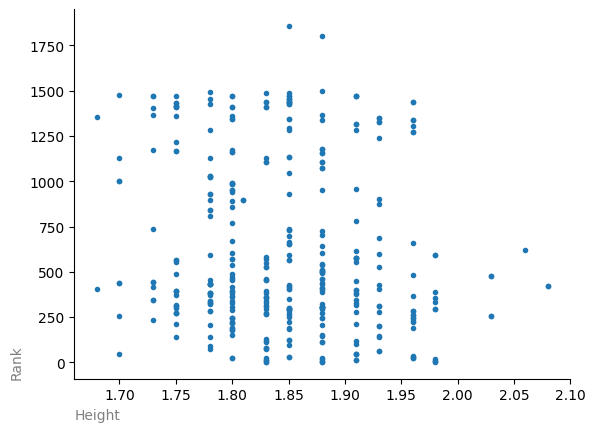

In [13]:
plt.scatter(x = men["height"],
            y = men["current_rank"],
            marker=".")

plt.xlabel("Height", loc="left", color="gray")
plt.ylabel("Rank", loc="bottom", color="gray")
plt.subplot().spines[["right", 'top']].set_visible(False);

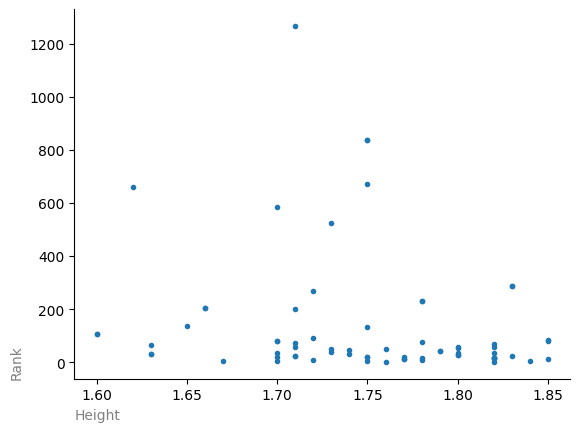

In [15]:
plt.scatter(x = women["height"],
            y = women["current_rank"],
            marker=".")

plt.xlabel("Height", loc="left", color="gray")
plt.ylabel("Rank", loc="bottom", color="gray")
plt.subplot().spines[["right", 'top']].set_visible(False);

# 11. What is the average duration of matches? 

In [46]:
# droping those matches with not enough values
time=MatchTimeInfo.dropna(subset='period_2')
time=time.fillna(0)
# calculating the total match time
time['total']=time['period_1'] + time['period_2'] + time['period_3']
# calculating the mean
time['total'].mean()

C:\Users\fz\AppData\Local\Temp\ipykernel_19584\169656349.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time=time.fillna(0)


6032.811912225706

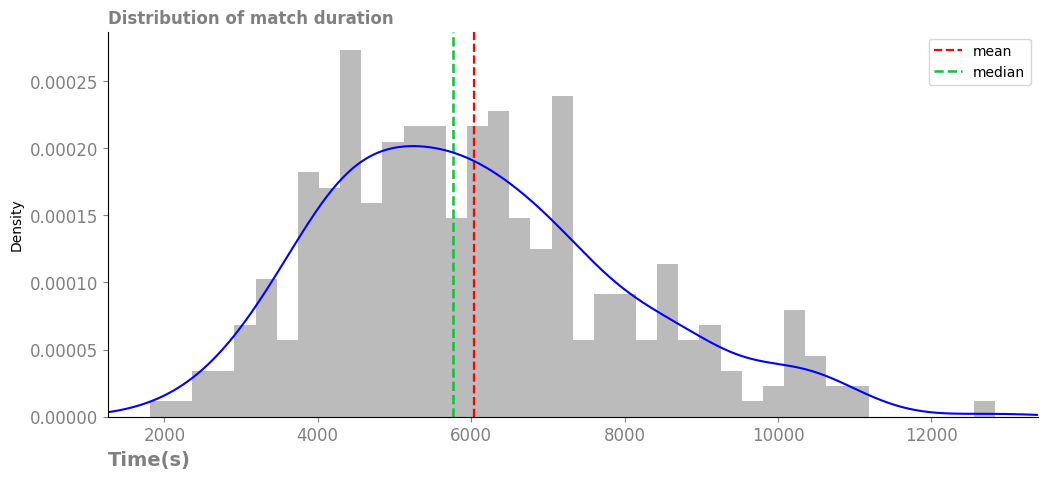

In [51]:
df11=time['total']
avg= time['total'].mean()
median_ =time['total'].median()
# sd=time['total'].std()

fig11,ax=plt.subplots(figsize = (12, 5))
ax.hist(df11, bins=40, density=True , color="#BBBBBB")
ax.axvline(avg , color='red', linestyle='dashed', linewidth=1.6 , label="mean")
ax.axvline(median_, color='#07C535', linestyle='dashed', linewidth=1.8 , label="median")
# ax.axvline(avg+sd, color='blue', linestyle='dashed', linewidth=1.5 , label="mean")
# ax.axvline(avg-sd, color='blue', linestyle='dashed', linewidth=1.5 , label="mean")
ax.legend()
min_, max_ = plt.xlim()
plt.xlim(min_, max_)
time['total'].plot.kde(color="blue")

ax.set_title(
    "Distribution of match duration",
    weight="bold",
    color="gray",
    fontsize=12,
    loc="left",
)
ax.set_xlabel("Time(s)", loc="left", weight="bold", fontsize=14, color="gray")
ax.spines[["right", "top"]].set_visible(False)
ax.ticklabel_format(axis="x", style="plain")
ax.tick_params(axis="x", colors="grey", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")


As the default period of all games are 3, we decide to delete those matches that dont contain at least two periods.

# 12. What is the average number of games per set in men's matches compared to women's matches?

 Calculating the number of games in each set by adding the values of each period .
_each period represents a set_

In [53]:
MatchAway_Score = MatchAwayScoreInfo.dropna(axis=1 , how="all").dropna(subset=[ "period_2"]).reset_index().drop("index", axis=1)
# i didn't consider one-set games
MatchHome_Score = MatchHomeScoreInfo.dropna(axis=1 , how="all").dropna(subset=[ "period_2"]).reset_index().drop("index", axis=1)

MatchAway_Team = MatchAwayTeamInfo.drop(['name', 'user_count', 'residence',
       'birthplace', 'height', 'weight', 'plays', 'turned_pro',
       'current_prize', 'total_prize',
       'name_code', 'country', 'full_name'] , axis=1)

MatchHome_Team = MatchHomeTeamInfo.drop(['name', 'user_count', 'residence',
       'birthplace', 'height', 'weight', 'plays', 'turned_pro',
       'current_prize', 'total_prize',
       'name_code', 'country', 'full_name'] , axis=1)


In [54]:
all_scores= pd.merge(MatchAway_Score, MatchHome_Score, on="match_id")
all_scores["games_per_set1"] = all_scores["period_1_x"] +all_scores["period_1_y"]
all_scores["games_per_set2"] = all_scores["period_2_x"] +all_scores["period_2_y"]
all_scores["games_per_set3"] = all_scores["period_3_x"] +all_scores["period_3_y"]

all_scores = all_scores.drop(['current_score_x', 'display_score_x', 'period_1_x',
       'period_2_x', 'period_3_x', 'period_1_tie_break_x',
       'period_2_tie_break_x', 'period_3_tie_break_x', 'current_score_y',
       'display_score_y', 'period_1_y', 'period_2_y', 'period_3_y',
       'period_1_tie_break_y', 'period_2_tie_break_y', 'period_3_tie_break_y'], axis=1)

# all_scores

creating a table of all players and scores

In [55]:
all_teams = pd.merge(MatchHome_Team , MatchAway_Team , how="outer" , on="match_id")


all_matches = pd.merge(all_scores, all_teams , on="match_id")
all_matches["games_mean"] = all_matches[["games_per_set1", "games_per_set2" ,"games_per_set3" ]].mean(axis=1)
all_matches["games_sum"] = all_matches[["games_per_set1", "games_per_set2" ,"games_per_set3" ]].sum(axis=1)
all_matches['gender'] = np.where((all_matches["gender_x"]=="M" )|(all_matches["gender_y"]=="M"), "Men", "women")

separated= all_matches.groupby('gender')["games_mean"].agg(["mean"])
separated = separated["mean"].astype("int64")
sum_sep = all_matches.groupby('gender')["games_sum"].agg(["min" , "max"])

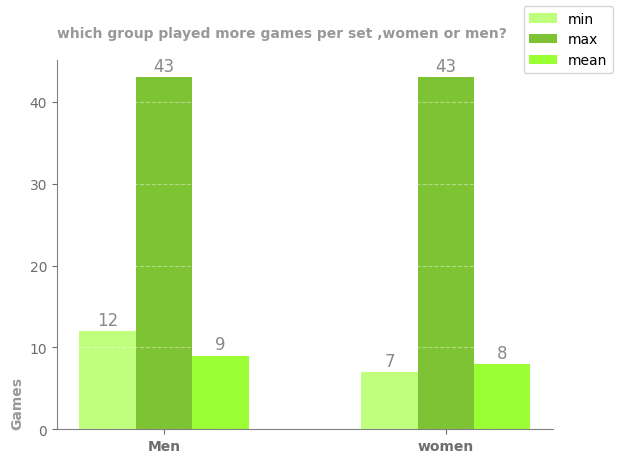

In [74]:

fig =plt.figure()
ax = plt.axes()

space_width = .2
c1= range(len(separated))
c2= [x + space_width for x in c1]
c3= [x + space_width for x in c2]

plt.bar(c1,sum_sep["min"],color="#B1FF5D" , alpha=0.8 , width=.2 , label= "min")
plt.bar(c2,sum_sep["max"],color="#5EB500" , alpha=0.8 , width=.2,label= "max")
plt.bar(c3, separated ,color="#81FF00" , alpha=0.8 , width=.2, label= "mean" )

for bar in ax.patches:
 ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=12,
                  xytext=(0, 8),
                  textcoords='offset points', color="#6D6D6D" , alpha= .8)


ax.set_xticks([r+ space_width for r in range(len(separated))])
ax.set_xticklabels(separated.index ,fontsize="8" ,weight="bold")
ax.spines[["top" , "right"]].set_visible(False)
ax.spines[['bottom' , 'left']].set_color('gray')
ax.grid(axis="y" ,linestyle="--" , color="white" , alpha=.4 )
ax.set_title("which group played more games per set ,women or men?", weight="bold", fontsize="10", color="#6D6D6D",  loc="left",y=1.04 ,alpha=.7)
# ax.set_xlabel("Ace" ,loc="left",  color="gray" ,weight="bold" )
ax.set_ylabel("Games", loc="bottom" , color="#6D6D6D" , weight="bold" , alpha=.7)
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )
fig.legend(loc="outside upper right")
plt.show()


# 13. What is the distribution of left-handed versus right-handed players? 

C:\Users\fz\AppData\Local\Temp\ipykernel_18772\185127742.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Left-handed" , "Right-handed"] , fontsize="8" ,weight="bold")


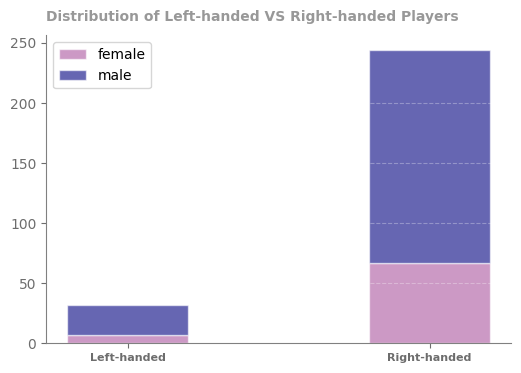

,plays,gender,name,total
0,left-handed,F,7,32
1,left-handed,M,25,32
2,right-handed,F,67,244
3,right-handed,M,177,244


In [166]:
whole_players=pd.concat([MatchHomeTeamInfo,MatchAwayTeamInfo], axis=0,ignore_index=True)
whole_players=whole_players.drop_duplicates(subset='player_id', ignore_index=True)

# whole_players['plays'].unique()
whole_players=whole_players.dropna(subset='plays')
gender_separated = whole_players.groupby(['plays','gender'] , as_index=False).agg({"name" :'count'})
plays_separated = whole_players.groupby(['plays'] , as_index=False).agg(total=('name','count'))
results= gender_separated.merge(plays_separated, on='plays', how='left')

# results

fig, (ax)= plt.subplots(figsize = (6, 4))

ax.bar(results[results['gender']=='F']['plays'], results[results['gender']=='F']['name'],  color='#AB569F' , alpha= .6 , edgecolor='white' ,  width = 0.4 , label= "female")
ax.bar(results[results['gender']=='M']['plays'], results[results['gender']=='M']['name'], bottom=  results[results['gender']=='F']['name'],color='#000080' , alpha= .6 , edgecolor='white' , width = 0.4 , label="male")

ax.set_title(
    "Distribution of Left-handed VS Right-handed Players",
    weight="bold", fontsize="10",  color="#6D6D6D",  loc="left",y=1.02 ,alpha=.7)
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )

ax.spines[['bottom' , 'left']].set_color('gray')
ax.grid(axis="y" ,linestyle="--" , color="white" , alpha=.3 )
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )
ax.set_xticklabels(["Left-handed" , "Right-handed"] , fontsize="8" ,weight="bold")
plt.legend()
plt.show()
results


# 14. What is the most common type of surface used in tournaments? 

The most common type of surface used in tournaments

In [37]:
most_common_surface = MatchTournamentInfo['ground_type'].value_counts().idxmax()
#print('the most common surface', most_common_surface)

Calculation the number of tournaments based on each type of surface

In [38]:
surface_counts = MatchTournamentInfo['ground_type'].value_counts()

Drawing a bar plot for Distribution of Tournaments by Ground Type

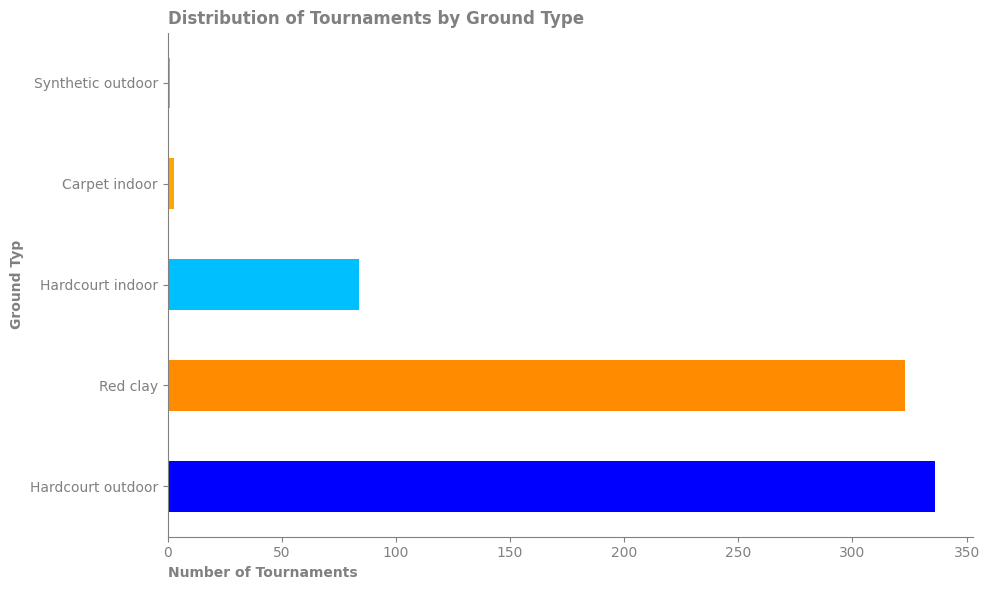

In [39]:

plt.figure(figsize=(10, 6))
colors = ['blue','darkorange','deepskyblue','orange','yellowgreen']
surface_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Tournaments by Ground Type',fontweight='bold',loc='left',color='grey')
plt.xlabel('Number of Tournaments',fontsize=10,fontweight='bold',loc='left',color='grey')
plt.ylabel('Ground Typ',fontsize=10,fontweight='bold',color='grey')
plt.tight_layout() 
plt.xticks(rotation=360)
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('white')
plt.tick_params(axis='x',colors='grey')
plt.tick_params(axis='y',colors='grey')
plt.show()

# 15. How many distinct countries are represented in the dataset? 

In [16]:
countries = players["country"].unique().size
print(f"There are {countries} countries in dataset")

There are 71 countries in dataset


# 16. Which player has the highest winning percentage against top 10 ranked opponents? 

In [23]:
# Getting the match ids of games that a high-rank player, plays in.
whole_players=pd.concat([MatchHomeTeamInfo,MatchAwayTeamInfo], axis=0,ignore_index=True)
ids_of_game_with_top10=whole_players[whole_players['current_rank']<11]['match_id']
ids_of_game_with_top10=ids_of_game_with_top10.tolist()
top10=pd.Series(ids_of_game_with_top10)


# filtering the event dataframe with the desireded games
filtered=MatchEventInfo[['match_id','winner_code','match_slug']]
filtered=filtered[filtered['match_id'].isin(top10)]

#adding players info to filtered dataframe
filtered=filtered.merge(MatchAwayTeamInfo[['match_id','name','player_id','current_rank']], on='match_id', how='left')
filtered=filtered.merge(MatchHomeTeamInfo[['match_id','name','player_id','current_rank']], on='match_id', how='left',suffixes=['_away','_home'])

#creating a column showing if a player wins the match or not
filtered['win_away']=np.where(filtered['winner_code']==2, 1, 0)
filtered['win_home']=np.where(filtered['winner_code']==1, 1, 0)

#creating a column to check if the opponent has played against top 10 or not
filtered['confirmed_home']=np.where(filtered['current_rank_away']<11,1,0)
filtered['confirmed_away']=np.where(filtered['current_rank_home']<11,1,0)

#creating two dataframes consisting only home or away data
home=filtered[['name_home','player_id_home','win_home','confirmed_home']].rename(columns={'name_home':'name','player_id_home':'player_id','win_home':'win','confirmed_home':'confirmed'})
away=filtered[['name_away','player_id_away','win_away','confirmed_away']].rename(columns={'name_away':'name','player_id_away':'player_id','win_away':'win','confirmed_away':'confirmed'})

# concat the hame and away together keep only those which are confiremed
total=pd.concat([home,away],axis=0,ignore_index=True)
total=total[total['confirmed']==1].reset_index()
total

total=total.groupby('name',as_index=False).agg(total_matches=('win','count'),win_percentage=('win','mean'))
total['win_percentage']*=100
total= total.sort_values('win_percentage', ascending=False)
total


,name,total_matches,win_percentage
1,Andreeva M.,1,100.0
6,Kalinina A.,1,100.0
9,Kudermetova V.,1,100.0
3,Dimitrov G.,2,50.0
0,Alexandrova E.,1,0.0
2,Davidovich Fokina A.,1,0.0
4,Humbert U.,1,0.0
5,Jarry N.,1,0.0
7,Kenin S.,1,0.0
8,Krueger A.,1,0.0


# 17. What is the average number of breaks of serve per match? 

`break of serve` To win a game as the receiving player or team, thereby breaking serve. At high level of play the server is more likely to win a game, so breaks are often key moments of a match. 

C:\Users\fz\AppData\Local\Temp\ipykernel_3912\3842030304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2[['home_stat', 'away_stat']] = period_2[['home_stat', 'away_stat']].astype('Int64')
C:\Users\fz\AppData\Local\Temp\ipykernel_3912\3842030304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2['sum'] = period_2[['home_stat', 'away_stat']].sum(axis=1)


average number of aces per match : 7.221153846153846


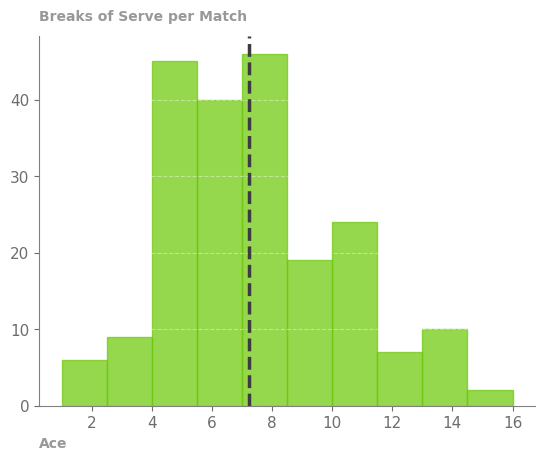

In [75]:

# period.groupby(["match_id" , "set_id"])
#Q3 Tables
period_2=PeriodInfo.loc[(PeriodInfo['statistic_name']=='break_points_converted') & (PeriodInfo["period"]=="ALL")]
period_2[['home_stat', 'away_stat']] = period_2[['home_stat', 'away_stat']].astype('Int64')
period_2['sum'] = period_2[['home_stat', 'away_stat']].sum(axis=1)
period_2 =period_2.dropna(axis=1 , how="all")
period_2 =period_2[period_2["sum"]!= 0].reset_index().drop("index", axis=1)
print(f"average number of aces per match : {period_2["sum"].mean()}")


fig =plt.figure()
ax = plt.axes()
plt.hist(period_2["sum"] , bins=10 ,color="#69C803" ,edgecolor='#6BC708', alpha=0.7)
ax.axvline(period_2["sum"].mean(), color='#3C3C3C', linestyle='dashed', linewidth=2.5)
ax.spines[["top" , "right"]].set_visible(False)
ax.spines[['bottom' , 'left']].set_color('gray')
ax.grid(axis="y" ,linestyle="--" , color="white" , alpha=.4 )

ax.set_title("Breaks of Serve per Match ", weight="bold", fontsize="10", color="#6D6D6D",  loc="left",y=1.02 , alpha=.7 )
ax.set_xlabel("Ace" ,loc="left",  color="#6D6D6D" ,weight="bold" ,alpha=.7 )
# ax.set_ylabel("Frequency", loc="bottom" , color="gray" , weight="bold")
ax.tick_params(axis="x" , colors="#6D6D6D", labelsize=11 )
ax.tick_params(axis="y" , colors="#6D6D6D", labelsize=11 )

plt.show()


The chart shows the number of break points converted by  both sides of the game (away and home) .

On average , players breaks `almost 7 serves per match.`